In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import koreanize_matplotlib
import pingouin as pg


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
file_name = glob("healthcare*.csv")
df = pd.read_csv(file_name[0])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# 성별 "Other" 행 제거 및 인덱스 리셋
df = df.drop(index = 3116)
df = df.reset_index()
# 인덱스 칼럼 제거
df = df.drop(columns = "index")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot: xlabel='gender', ylabel='stroke'>

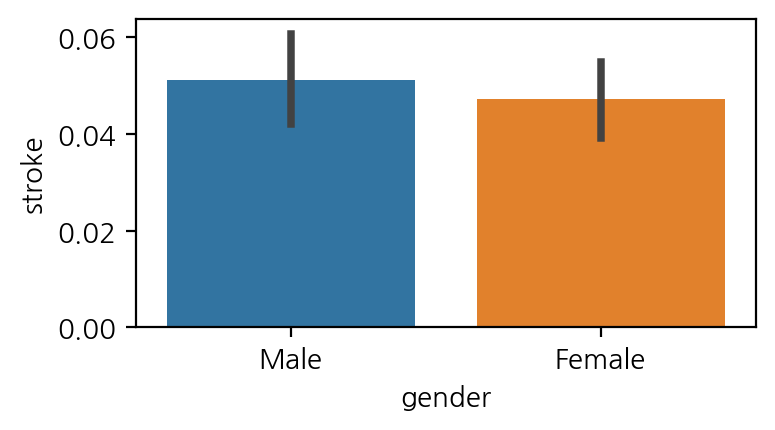

In [5]:
plt.figure(figsize = (4,2))
sns.barplot(data = df, x = "gender", y = "stroke")

In [6]:
df_gender = df[["id", "gender", "stroke"]]

In [7]:
df_gender.head()

,id,gender,stroke
0,9046,Male,1
1,51676,Female,1
2,31112,Male,1
3,60182,Female,1
4,1665,Female,1


In [8]:
df_gender.index = df_gender["id"]

In [9]:
df_gender.drop(columns = "id")

,gender,stroke
id,,
9046,Male,1
51676,Female,1
31112,Male,1
60182,Female,1
1665,Female,1
...,...,...
18234,Female,0
44873,Female,0
19723,Female,0


In [10]:
df_gender = df_gender.groupby(["gender","stroke"])["id"].count().unstack(level = 1)
df_gender.head()

stroke,0,1
gender,,
Female,2853,141
Male,2007,108


In [14]:
df_gender.rename(columns={0:'No', 1:"Yes"})

stroke,No,Yes
gender,,
Female,2853,141
Male,2007,108


<AxesSubplot: xlabel='stroke', ylabel='stroke'>

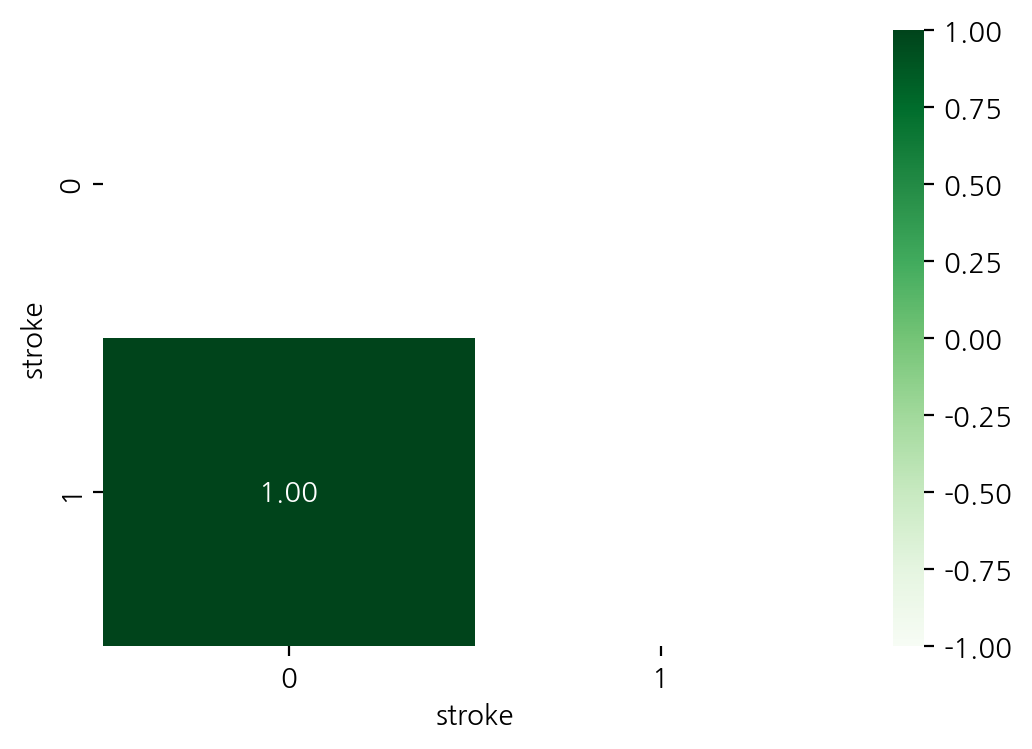

In [15]:
corr = df_gender.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot = True, fmt = ".2f",vmin = -1, vmax = 1, cmap ="Greens", mask = mask)

In [21]:
corr = df_gender.corr()
corr

stroke,0,1
stroke,,
0,1.0,1.0
1,1.0,1.0


In [20]:
df_gender.index

Index(['Female', 'Male'], dtype='object', name='gender')

In [22]:
gender_list = []
for i in df["gender"]:
    if i == "Male":
        gender_list.append(0)
    elif i == "Female":
        gender_list.append(1)
df["gender2"] = gender_list

In [23]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender2
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1


In [24]:
pg.corr(df.stroke,df.gender2)

,n,r,CI95%,p-val,BF10,power
pearson,5109,-0.009081,"[-0.04, 0.02]",0.516396,0.022,0.099463
